# Homework on SVMs and Spectral Clustering


------------------------------------------------------
*Machine Learning II. Master in Big Data Analytics*

*Emilio Parrado Hernández eparrado@ing.uc3m.es*

------------------------------------------------------



In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Introduction

The key to the success of a supervised learning algorithm is the number and quality of the labels. Collecting labelled examples can be costly and difficult in some applications. In this assignment you will simulate an scenario in which labels are scarce. You will study the impact of the number of available labels in the results and explore a strategy to try to achieve good results with a reduced number of labelled examples.

You will work with the MNIST data that we used in the SVM lab session. We have prepared two binary problems of different nature with these data. 

You can use the values for the SVM parameters `C=100` and `gamma=0.001` found in that corresponding lab session.

# 1. SVM with randomly selected labels

The first result is to analize the changes in performance of the SVM as the number of available labelled examples increases. The data for the first problem that you will study is in files "x_01.csv" and "y_01.csv". This problem consists in to separate 0s from 1s.



The code in the following cell loads these data and plots some of the examples.

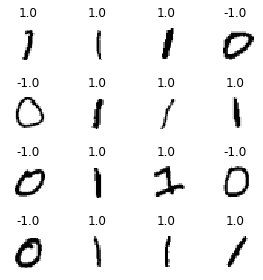

In [2]:
Y = np.loadtxt("y_01.csv", 
                       delimiter=",") 
X = np.loadtxt("x_01.csv", 
                       delimiter=",")

nrows = 4
ncols = 4
ff,aa = plt.subplots(nrows, ncols,figsize=(4,4))
ii = 0
for rr in range(nrows):
    for cc in range(ncols):
        aa[rr][cc].set_axis_off()
        aa[rr][cc].imshow(X[ii].reshape(28,28), 
                          cmap=plt.cm.gray_r, 
                          interpolation='nearest')
        aa[rr][cc].set_title(repr(Y[ii]))
        ii += 1
ff.tight_layout()  

It seems a reasonably easy classification in terms of the separability of the classes. Therefore, it should be easy to achieve good classification results with a training dataset of relative small size. 

You are now analizing how the results of the SVM improve as you get more and more labelled  data. In the next cell implement python code that peforms the following functionalities.

- Run a `for` loop for all the values in the np.array `v_num_labels`. Let's say in iteration `nn` of the loop  `num_data = v_num_labels[nn]`
    - construct a training set of `num_data` observations by sampling at random `num_data` rows of `X` and the corresponding elements of `Y` as true labels. In this iteration of the loop you are simulating you only have labels for these `num_data` observations, therefore you can only use these observations to fit the SVM.
    - train a SVM with this training subset of size `num_data`
    - evaluate this SVM with `X` and `Y` and store the result in the position `nn` of `acc_svm_random_label`. Here you are using the whole dataset, but just for evaluation and reporting purposes, not for fitting the model.
    
- Plot `acc_svm_random_label` vs `v_num_labels` and discuss the impact of the number of available labelled examples in the classification accuracy

---

**Note**

It could happen that, specially for the smallest values of `v_num_lables`, all the `ll` samples belong to the same class. In that case store a $0.5$ in the corresponding position of `acc_svm_random_label` since you would think all the observations belong to a same class and therefore only half of the observations in `X` will get a correct classification.

In [ ]:

v_num_labels = np.array([2,4,8,10,20,30,40,60,80,100,200,300,400]) # number of labelled samples
acc_svm_random_label = np.empty(len(v_num_labels))

"""
YOUR CODE:

- for loop: num_data runs for all the values in v_num_labels
    - Select num_data training examples at random
    - Train an SVM with these num_data examples
    - Evaluate this SVM using X and Y
"""
        
plt.figure()

plt.plot(v_num_labels, acc_svm_random_label, label='SVM, labels got at random')

plt.legend()
plt.xlabel('Num labels')
plt.ylabel('accuracy')
plt.xscale('log')
plt.grid()



To get a more robust statistical significance of the results, in the next cell run the above loop a number of `NSIM` times, storing the results in the 2D array `acc_svm_random_label`. Then plot the mean of `acc_svm_random_label` and one standard deviation

In [ ]:
v_num_labels = np.array([2,4,8,10,20,30,40,60,80,100,200,300,400]) # number of labelled samples
NSIM=100
acc_svm_random_label = np.empty((NSIM, len(v_num_labels))) # notice each row is for each of the NSIM simulations

"""
YOUR CODE HERE
"""


plt.figure()

plt.plot(v_num_labels, np.mean(acc_svm_random_label,0), label='SVM, labels got at random', color='blue')
plt.fill_between(v_num_labels, np.percentile(acc_svm_random_label,25,axis=0),
                 np.percentile(acc_svm_random_label,75, axis=0),
                 color='blue',alpha=0.3)
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('accuracy')
plt.xscale('log')
plt.grid()

**Discuss the uncertainty of the results depending of the number of available labels to train the SVM.**

In [ ]:
### YOUR DISCUSSION HERE

# 2.- Spectral Clustering with one label per cluster

Clustering is an unsupervised learning paradigm. It means we can use clustering algorithms with unlabelled data. A way of doing a classification with a very constrained budget for labels could be the following. Imagine you can afford `num_data` labels:
- Run a clustering algorithm and split your data in `num_data` clusters. We (optimistically) assume each cluster will be homogeneous (all the data in a same cluster should be assigned to a same class)
- Now run a loop for all the clusters to classify the data of the samples
    - Select one of the samples in each cluster and ask for its label, call `y_cluster` this label
    - Use that label to classify all the observations that belong to this cluster.

In the cell below complete the python code of function `my_spectral_clustering`. This function implements this classification scheme using [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) as clustering method.

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
class oracle(object):
    """
    Simulates an oracle that provides with a labels for  input observations. 
    You don't have to edit this code
    """
    def __init__(self, x, y):
        self.dim = x.shape[1]
        self.knn = KNeighborsClassifier(n_neighbors=1).fit(x,y)
        
    def get_label(self, x):
        return self.knn.predict(x.reshape(-1,self.dim))
    
def my_spectral_clustering(x, my_oracle, n_clusters=2, gamma=1):
    """
    x: array with the data, each row is an observation
    my_oracle: oracle object. Used to get labels of specific samples.
    n_clusters: number of clusters in which you split the data. All the elements in one cluster will get the same label
    gamma: gamma for the RBF kernel of the spectral clustering.
    """
    Nt = x.shape[0]
    
    """
    YOUR CODE
    
    - Fit Spectral Clustering
    
    """
    micluster = # Fit Spectral Clustering
   
    predictions = np.empty(Nt) # array to fill with the predicted class for all the instances in x
    for cc in range(n_clusters):
        # YOUR CODE
        #
        # - get the instances that are in cluster cc
        # - Pick one of these instances at random and call it my_x
        y_cluster = my_oracle.get_label(my_x)
        # 
        # - fill the positions of the instances in cluster cc in the array predictions with y_cluster
        
    return predictions

Now use the function `my_spectral_clustering` to find out the performance of this proposed classification method based in clustering with a reduced number of labels using the number of clusters indicated by `v_num_labels` and a value of `gamma=0.001` for the RBF kernel of the spectral clustering. 

In [ ]:
v_num_labels = np.array([2,4,8,10,20,30,40,60,80,100,200,300,400]) # number of labelled samples
acc_spectral_clustering = np.empty(len(v_num_labels))
gamma = 0.001
my_oracle = oracle(X,Y)
for ii,n_clusters in enumerate(v_num_labels):
    predictions = my_spectral_clustering(X, my_oracle, n_clusters=n_clusters, gamma=gamma)
    acc_spectral_clustering[ii] = np.mean(predictions == Y)
    

Plot the classification accuracy of the spectral clustering as a function of the number of available labels

In [ ]:
# YOUR CODE TO PRODUCE THE PLOT

Explore the dependence of the classification accuracy of the spectral clustering with the values of `gamma`. 

In [ ]:
v_gamma = [1e-4, 1e-3, 1e-2, 1e-1] # at least for these values

acc_spectral_clustering = np.empty((len(v_gamma),len(v_num_labels))) # notice each row is for a value of gamma

# Your code to fill acc_spectral_clustering


In [ ]:
plt.figure()
for ig, gamma in enumerate(v_gamma[:-1]):
    plt.plot(v_num_labels, acc_spectral_clustering[ig,:], label='Spectral Clustering, gamma {0:.4f}'.format(gamma))
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('accuracy')
plt.xscale('log')
plt.grid()

Choose one of the values of `gamma` explaining the reasons behind this selection. Plot the evolution (as the number of clusters varies) of the accuracy of the Spectral Clustering with that value of `gamma`  and compare these results with those obtained with the SVM for the same number of labels. Including the curves of  spectral clustering and SVM in the same figure can help organize the discussion.

In [ ]:
# YOUR CODE TO PRODUCE THE PLOT

In [ ]:
# YOUR DISCUSSION

# 3.- Binary problem even vs odd 

Repeat the analysis with the data included in the files "x_all_even_odd.csv" and "y_all_even_odd.csv". Discuss the separability of the classes in this problem with respect to the separability of the 0 vs. 1 case.

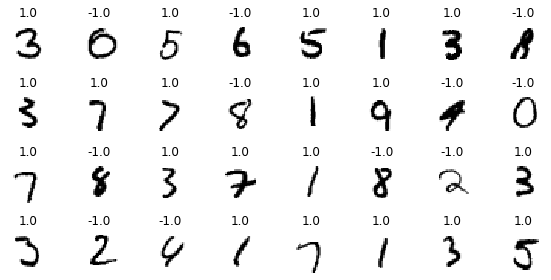

In [7]:
Y = np.loadtxt("y_all_even_odd.csv", 
                       delimiter=",") 
X=np.loadtxt("x_all_even_odd.csv", 
                       delimiter=",")

nrows = 4
ncols = 8
ff,aa = plt.subplots(nrows, ncols,figsize=(8,4))
ii = 0
for rr in range(nrows):
    for cc in range(ncols):
        aa[rr][cc].set_axis_off()
        aa[rr][cc].imshow(X[ii].reshape(28,28), 
                          cmap=plt.cm.gray_r, 
                          interpolation='nearest')
        aa[rr][cc].set_title(repr(Y[ii]))
        ii += 1
ff.tight_layout()  

In [ ]:
# YOUR CODE TO REPEAT THE ANALYSIS OF SECTIONS 1 & 2

In [ ]:
# YOUR DISCUSSION

# 4.- Final discussion

Put all the results in a same plot and discuss the ranges of number of available labels for which each classification method seems more convenient. Include in the discussion the influence of the separability of the problem.

In [ ]:
# YOUR CODE TO PRODUCE THE PLOTS

In [ ]:
# YOUR DISCUSSION

# Extra 

Check what happens if you train the SVMs with the labelled samples that the spectral clustering uses to label each cluster instead of with the randomly selected labels.